# Data exploration

In [2]:
# importamos los paquetes necesarion
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from mlxtend.frequent_patterns import apriori

% matplotlib inline 

In [30]:
df_sessions = pd.read_csv('C:\\Users\\OLX - Gonzalo\\Desktop\\tesis\\session_base.tsv', sep = '\t')


In [37]:
df_sessions.head()

,country,device,session_fake_id,started_session_logged,first_session,is_organic,active_listings,num_events_session,sum_events_session,millisec_session_duration,starter,finisher
0,1,2,138340-0,0,0,1,0,6,12,1004188,0,0
1,1,1,146328-0,0,0,1,0,12,43,1090622,0,0
2,2,1,251585-0,1,0,1,0,7,27,2013083,0,0
3,1,1,28995-0,1,0,1,2,8,10,145014,0,0
4,1,1,273965-0,0,0,1,0,3,23,3764916,0,0


In [32]:
df_sessions['num_events_session'].describe().apply(lambda x: format(x, 'f'))

count    1400243.000000
mean           5.014195
std            5.249324
min            1.000000
25%            2.000000
50%            3.000000
75%            6.000000
max           56.000000
Name: num_events_session, dtype: object

(array([  1.05261800e+06,   2.25350000e+05,   7.24550000e+04,
          2.08750000e+04,   1.62660000e+04,   8.34100000e+03,
          3.60100000e+03,   6.51000000e+02,   7.60000000e+01,
          1.00000000e+01]),
 array([  1. ,   6.5,  12. ,  17.5,  23. ,  28.5,  34. ,  39.5,  45. ,
         50.5,  56. ]),
 <a list of 10 Patch objects>)

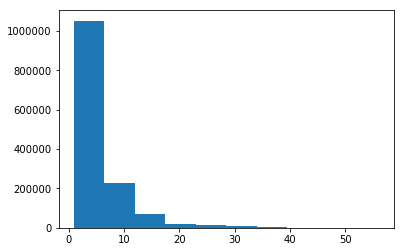

In [38]:
plt.hist(df_sessions['num_events_session'])

In [36]:
df_sessions['sum_events_session'].describe().apply(lambda x: format(x, 'f'))

count    1400243.000000
mean          15.281857
std           36.245927
min            1.000000
25%            1.000000
50%            5.000000
75%           17.000000
max         7231.000000
Name: sum_events_session, dtype: object

(array([  1.39990800e+06,   2.74000000e+02,   3.00000000e+01,
          2.00000000e+01,   6.00000000e+00,   3.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          1.00000000e+00]),
 array([  1.00000000e+00,   7.24000000e+02,   1.44700000e+03,
          2.17000000e+03,   2.89300000e+03,   3.61600000e+03,
          4.33900000e+03,   5.06200000e+03,   5.78500000e+03,
          6.50800000e+03,   7.23100000e+03]),
 <a list of 10 Patch objects>)

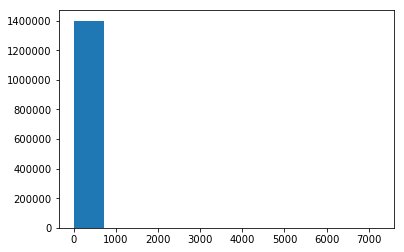

In [39]:
plt.hist(df_sessions['sum_events_session'])

In [41]:
(df_sessions['millisec_session_duration']/60000).describe().apply(lambda x: format(x, 'f'))

count    1400243.000000
mean          32.075868
std         7545.118683
min          -36.672517
25%            0.003767
50%            1.945233
75%            9.257067
max      4122336.460100
Name: millisec_session_duration, dtype: object

(array([  1.40022500e+06,   0.00000000e+00,   8.00000000e+00,
          5.00000000e+00,   0.00000000e+00,   2.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          3.00000000e+00]),
 array([ -2.20035100e+06,   2.47320384e+10,   4.94662772e+10,
          7.42005160e+10,   9.89347548e+10,   1.23668994e+11,
          1.48403232e+11,   1.73137471e+11,   1.97871710e+11,
          2.22605949e+11,   2.47340188e+11]),
 <a list of 10 Patch objects>)

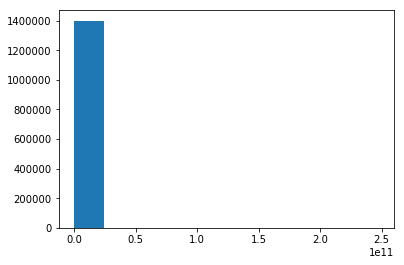

In [47]:
plt.hist(df_sessions['millisec_session_duration'])

In [50]:
df_sessions['active_listings'].describe().apply(lambda x: format(x, 'f'))

count    1400243.000000
mean           1.479367
std           23.528356
min            0.000000
25%            0.000000
50%            0.000000
75%            0.000000
max         2499.000000
Name: active_listings, dtype: object

In [54]:
df_sessions.groupby('starter').count()

,country,device,session_fake_id,started_session_logged,first_session,is_organic,active_listings,num_events_session,sum_events_session,millisec_session_duration,finisher
starter,,,,,,,,,,,
0,1317608,1317608,1317608,1317608,1317608,1317608,1317608,1317608,1317608,1317608,1317608
1,82635,82635,82635,82635,82635,82635,82635,82635,82635,82635,82635


In [55]:
df_sessions.groupby('finisher').count()

,country,device,session_fake_id,started_session_logged,first_session,is_organic,active_listings,num_events_session,sum_events_session,millisec_session_duration,starter
finisher,,,,,,,,,,,
0,1368371,1368371,1368371,1368371,1368371,1368371,1368371,1368371,1368371,1368371,1368371
1,31872,31872,31872,31872,31872,31872,31872,31872,31872,31872,31872


# Frequent itemset mining

In [3]:
# cargo los dataset en tres partes y los uno
df1 = pd.read_csv('C:\\Users\\OLX - Gonzalo\\Desktop\\tesis\\event_base_1.tsv', sep = '\t')
df2 = pd.read_csv('C:\\Users\\OLX - Gonzalo\\Desktop\\tesis\\event_base_2.tsv', sep = '\t')
df3 = pd.read_csv('C:\\Users\\OLX - Gonzalo\\Desktop\\tesis\\event_base_3.tsv', sep = '\t')

df_events = pd.concat([df1, df2, df3])

In [4]:
df_events.describe()

,event_id,before_or_not_start
count,7.064903e+06,7.064903e+06
mean,1.330440e+01,8.480422e-01
std,1.498724e+01,3.589800e-01
min,1.000000e+00,0.000000e+00
25%,2.000000e+00,1.000000e+00
50%,8.000000e+00,1.000000e+00
75%,1.900000e+01,1.000000e+00
max,1.010000e+02,1.000000e+00


In [28]:
basket_before = (df_events[df_events['before_or_not_start'] ==1]
          .groupby(['session_fake_id', 'event_id'])['session_fake_id']
          .count().unstack().reset_index().fillna(0)
          .set_index('session_fake_id'))

basket_all = (df_events
          .groupby(['session_fake_id', 'event_id'])['session_fake_id']
          .count().unstack().reset_index().fillna(0)
          .set_index('session_fake_id'))

In [34]:
basket_before.head()

event_id,1,2,3,4,5,6,7,8,9,10,...,92,93,94,95,96,97,98,99,100,101
session_fake_id,,,,,,,,,,,,,,,,,,,,,
1-0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10-0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100-0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1000-0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10000-0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
all_base = df_sessions.merge(basket_before, left_on='session_fake_id', right_on='session_fake_id', how='left')

KeyError: 'session_fake_id'

In [35]:
frequent_itemsets = apriori(basket.sample(n = 1000, replace = False), min_support=0.01, use_colnames=True)

KeyboardInterrupt: 

In [27]:
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets[ (frequent_itemsets['length'] > 3)]

,support,itemsets,length
57,0.1108,"[1, 2, 8, 9]",4
